In [145]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
import re

- Зібрати дані опитування

In [146]:
# зібрати всі дані в df
df_bus_stantion = pd.read_csv("./data/Bus Stantion + Park_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #bus stanion
df_central_square = pd.read_csv("./data/Central square_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #central square
df_linkedin = pd.read_csv("./data/Lkdn_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #linkedin
df_social_media = pd.read_csv("./data/Володимир Медіа_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #internet
df_kogorta = pd.read_csv("./data/Когорта_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #individual groups

- Функція упорядкування даних

In [147]:
def add_origin_column(df, column_name):
    df["origin"] = column_name
    df = df.rename(
        columns={
            "Стать респондента": "sex", 
            "Рік народження": "age",
            "Скільки часу ви проживаєте у місті Володимир": "years_lived",
            "Ваш рід занять": "occupation",
            "Рівень доходу": "sallary",
            "Яку частину доходу ви витрачаєте на діяльсть пов'язану з туризмом та сферою обслуговування ": "Income_spent_on_tourism",
            "Як ви ставитесь до візитів хасидів до Володимира?": "hasidic_loyalty",
            "Як ви ставитесь до туристів з Польщі?": "polish_loyalty",
            "Як ви ставитесь до туристів з інших країн?":"other_loyalty",
            "На вашу думку який у вас рівень володіння англійською мовою?":"english_level",
            "На вашу думку який у вас рівень володіння польською мовою?":"polish_level",
            "Чи достатньо, на вашу думку, у Володимирі готелей, для розміщення туристів чи туристичних груп?":"holels_sits",
            "Чи достатньо, на вашу думку, у Володимирі закладів харчування?":"caffee_sits",
            "Чи вважаєте ви, що Володимир достатньо представлений в інтернеті як туристичне місто?":"internet_representation",
            " Які туристичні об’єкти у Володимирі є, на вашу думку, ключовими для приваблення туристів?":"key_items",
            "Які зміни в туристичній інфраструктурі ви вважаєте найбільш необхідними? (можна кілька варіантів)":"key_changes",
            "Які об’єкти, на вашу думку, слід відкрити чи розвинути у Володимирі, щоб туристи залишалися довше? (можна кілька варіантів)":"tourism_development",    
            "Як ви ставитесь до візитів хасидів до Володимира?\n\nцього читати респондентам не потрібно (Карлін-столінські хасиди, вшановують пам’ять свого цадика (духовного провідника) Шломо Готліба Карлінера, який помер у 1792 році і похований на колишньому єврейському цвинтарі, нині це паркова зона в районі вулиці Драгоманова)  " : "hasidic_loyalty2"       
            })
    return df

- додати необхідні колонки

In [148]:
# прогнати дані через функцію нормалізації
df_bus_stantion = add_origin_column(df_bus_stantion, "bus stantion")
df_central_square = add_origin_column(df_central_square, "central_square")
df_linkedin = add_origin_column(df_linkedin, "linkedin")
df_social_media = add_origin_column(df_social_media, "social media")
df_kogorta = add_origin_column(df_kogorta, "test group")

# одбєднати дані в спільний dataframe
df_union =  pd.concat([df_bus_stantion, df_central_square, df_linkedin, df_social_media, df_kogorta], axis=0, ignore_index=True)
df_union["_hasidic_loyalty"] = df_union["hasidic_loyalty"].fillna(df_union["hasidic_loyalty2"])

#обробка поодиноких випадків помилкового внесення даних року народження
df_union['age'] = df_union['age'].replace("09.07.89", 1989)
df_union['age'] = df_union['age'].replace("05.08.1993", 1993)

#перетворити категорійний час проживання у місті на числовий 
living4_dict = {
    "10-20 років": 15,
    "2-5 років": 3.5,
    "до 5 років": 2.5,
    'менше 2 років': 1, 
    '5-10 років': 7.5,
    'більше 20 років': 20
}
#перетворити категорійну заробітню плату на числовий аналог
sallary_dict = {
    'до 10 000 грн':5000,
    '10 000 грн - 20 000 грн':15000, 
    '20 000 грн - 40 000 грн':30000, 
    '40 000 грн - 60 000 грн':50000,
    '60 000 грн - 100 000 грн':80000, 
    '> 100 000 грн':100000
}
#перетворити категорійний відсоток витрат на числовий аналог
spent_on_tourism_dict = {
    r'до 5%':2.5,
    r'5%-10%':5,
    r'10%-20%':15,
    r'>20%':25
}

df_union["_years_lived"] = df_union["years_lived"].replace(living4_dict) #визначити час проживання респондента
df_union["_sallary"] = df_union["sallary"].replace(sallary_dict) #визначити зп респондента
df_union["_income_spent_on_tourism"] = df_union["Income_spent_on_tourism"].replace(spent_on_tourism_dict) #визначити зп респондента

df_union['_age'] = 2025 - pd.to_numeric(df_union['age'], errors='coerce') #визначити вік респондента
df_union["Income_spent_on_tourism"].unique()


C:\Users\ПК\AppData\Local\Temp\ipykernel_14532\4113483733.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_union["_years_lived"] = df_union["years_lived"].replace(living4_dict) #визначити час проживання респондента
C:\Users\ПК\AppData\Local\Temp\ipykernel_14532\4113483733.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_union["_sallary"] = df_union["sallary"].replace(sallary_dict) #визначити зп респондента
C:\Users\ПК\AppData\Local\Temp\ipykernel_14532\4113483733.py:44: FutureWarning: Downcasting behavior in `replace

array(['10%-20%', 'до 5%', '>20%', nan, '5%-10%'], dtype=object)

- розбити на таблицю key changes, щоб перевести в буль

In [149]:
# базова нормалізація: заміна різних апострофів і обрізання пробілів по краях
clean = (df_union['key_changes']
         .fillna('')
         .str.replace(r"[`ʼ’']", "’", regex=True))

# get_dummies сам розіб'є за ; і зробить 0/1-колонки
dummies = (clean.str.get_dummies(sep=';')
                .rename(columns=lambda c: c.strip()))  # обрізати пробіли у назв

# (необов'язково) префікс для зручності
dummies = dummies.rename(columns=lambda c: '_key_changes_' + c)

# приєднати до датафрейму
df_union = pd.concat([df_union, dummies], axis=1)

- розбити на таблицю key changes, щоб перевести в буль

In [150]:
# базова нормалізація: заміна різних апострофів і обрізання пробілів по краях
clean = (df_union['key_items']
         .fillna('')
         .str.replace(r"[`ʼ’']", "’", regex=True))

# get_dummies сам розіб'є за ; і зробить 0/1-колонки
dummies = (clean.str.get_dummies(sep=';')
                .rename(columns=lambda c: c.strip()))  # обрізати пробіли у назв

# (необов'язково) префікс для зручності
dummies = dummies.rename(columns=lambda c: '_key_items' + c)

# приєднати до датафрейму
df_union = pd.concat([df_union, dummies], axis=1)

- розбити на таблицю key changes, щоб перевести в буль

In [151]:
# базова нормалізація: заміна різних апострофів і обрізання пробілів по краях
clean = (df_union['tourism_development']
         .fillna('')
         .str.replace(r"[`ʼ’']", "’", regex=True))

# get_dummies сам розіб'є за ; і зробить 0/1-колонки
dummies = (clean.str.get_dummies(sep=';')
                .rename(columns=lambda c: c.strip()))  # обрізати пробіли у назв

# (необов'язково) префікс для зручності
dummies = dummies.rename(columns=lambda c: '_tourism_development' + c)

# приєднати до датафрейму
df_union = pd.concat([df_union, dummies], axis=1)
df_union.head(1)

,Timestamp,sex,age,years_lived,occupation,sallary,Income_spent_on_tourism,hasidic_loyalty2,polish_loyalty,other_loyalty,...,"_tourism_developmentЛазертаг, боулінг, кінотеатр","_tourism_developmentЛітературно-мистецький простір (книгарня-кав’ярня, сцена)",_tourism_developmentМайданчик для регулярних ярмарків,_tourism_developmentМакДональдс чи інший fast-food,_tourism_developmentМузей з інтерактивними технологіями (VR/AR),"_tourism_developmentПарк пригод (мотузковий, zip-line)",_tourism_developmentРекреаційна зона відпочинку з водоймою,"_tourism_developmentСувенірні крамниці, майстерні ремесел",_tourism_developmentТоргово-розважальний центр,_tourism_developmentЦентр історії княжого Володимира
0,2025/09/06 11:41:37 AM GMT+3,Чоловіча,2009.0,10-20 років,Студент,10 000 грн - 20 000 грн,10%-20%,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",...,1,1,0,1,0,1,1,0,1,1


In [152]:
# Сформувати датафрейм для обробки
df_total = df_union.drop(df_union[["age", "years_lived", "sallary", "Income_spent_on_tourism","hasidic_loyalty2", "hasidic_loyalty","key_items", "key_changes", "tourism_development"]], axis=1)
df_total['spends_to_tourism'] = df_total['_sallary']*df_total['_income_spent_on_tourism']/100
df_total.to_excel("test_output.xlsx")

In [153]:
# Функція формування кругової діаграми
def radical(series, show_nan=True, nan_label="Не вказано", title=None, ax=None, set_colors=None, angle=90):
    s = series.copy()

    if show_nan:
        s = s.fillna(nan_label)
        counts = s.value_counts(dropna=False)
    else:
        counts = s.dropna().value_counts()

    total = counts.sum()
    if total == 0:
        print("Немає даних для відображення.")
        return None

    labels = [f'{k}, {round(v/total*100,1)}%' for k, v in counts.items()]

    if not set_colors:
        cmap = plt.cm.Blues
        colors = cmap(np.linspace(0.35, 0.9, len(counts)))
    else:
        cmap = plt.get_cmap('tab20', len(counts))   # або 'Set3', 'tab20b', 'tab20c'
        colors = cmap(range(len(counts)))


    if ax is None:
        ax = plt.gca()

    counts.plot(
        kind='pie',
        labels=labels,
        autopct=None,
        ylabel='',
        startangle=angle,
        labeldistance=1.1,
        colors=colors,
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
        textprops={"fontsize": 10},
        ax=ax
    )

    if title is None:
        title = f"Розподіл: {getattr(series, 'name', '')}".strip(": ")
    ax.set_title(title)

    return ax

### Розподіл по статті

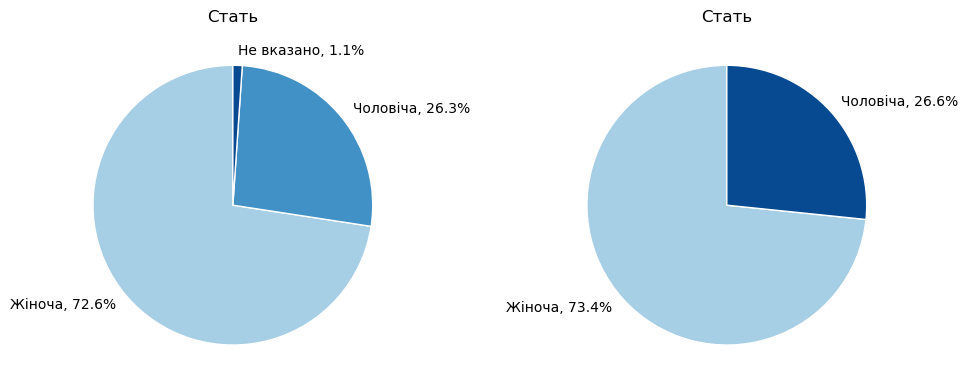

In [154]:
# Сформувати розподіл по гендеру

# radical(df_total['sex'], False,...,"Розподіл по статті")
# radical(df_total['sex'], True,"Не вказано","Розподіл по статті")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

radical(df_union['sex'], show_nan=True,  nan_label="Не вказано", title="Стать", ax=axes[0])
radical(df_union['sex'], show_nan=False, title="Стать", ax=axes[1])

plt.tight_layout()
plt.show()

### Лояльність до хасидів

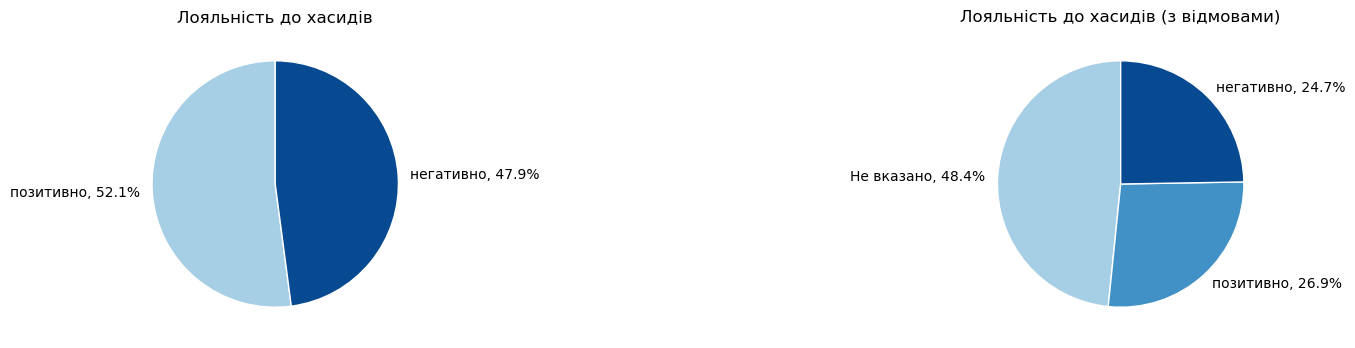

In [155]:
hasidic_loyalty = df_total['_hasidic_loyalty']

hsd_llt_dict = {
    'Позитивно, туристи це завжди добре для міста':'позитивно',
    'Негативно, вони залишають багато сміття і вони люди іншої культури, яка для нас чужа':'негативно',
    'На мене це ніяк не впливає': None
}

hasidic_loyalty =hasidic_loyalty.replace(hsd_llt_dict)
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

radical(hasidic_loyalty, show_nan=False, title="Лояльність до хасидів", ax=axes[0])
radical(hasidic_loyalty, show_nan=True, title="Лояльність до хасидів (з відмовами)", ax=axes[1])
plt.show()


### Лояльність до польських туристів

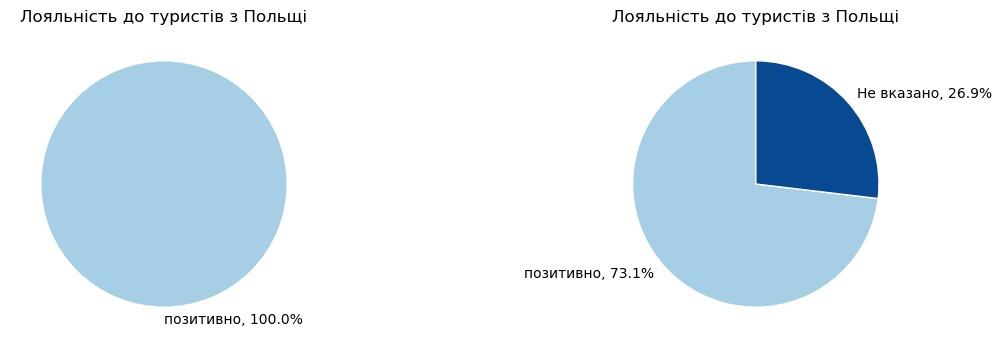

In [156]:
polish_loyalty = df_total['polish_loyalty']

hsd_llt_dict = {
    'Позитивно, туристи це завжди добре для міста':'позитивно',
    'Негативно, вони залишають багато сміття і вони люди іншої культури, яка для нас чужа':'негативно',
    'На мене це ніяк не впливає': None
}

polish_loyalty =polish_loyalty.replace(hsd_llt_dict)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

radical(polish_loyalty, show_nan=False, title="Лояльність до туристів з Польщі", ax=axes[0])
radical(polish_loyalty, show_nan=True, title="Лояльність до туристів з Польщі", ax=axes[1])
plt.show()

### Лояльність до туристів з інших країн

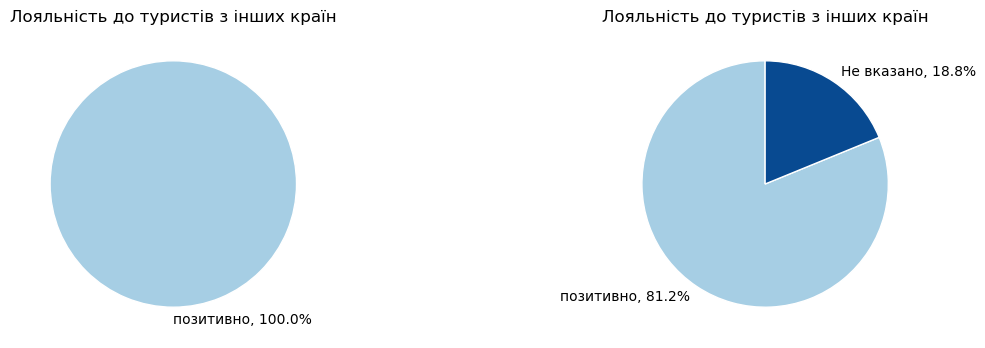

In [157]:
other_loyalty = df_total['other_loyalty']

oth_llt_dict = {
    'Позитивно, туристи це завжди добре для міста':'позитивно',
    'Негативно, вони залишають багато сміття і вони люди іншої культури, яка для нас чужа':'негативно',
    'На мене це ніяк не впливає': None
}

other_loyalty = other_loyalty.replace(oth_llt_dict)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

radical(other_loyalty, show_nan=False, title="Лояльність до туристів з інших країн", ax=axes[0])
radical(other_loyalty, show_nan=True, title="Лояльність до туристів з інших країн", ax=axes[1])
plt.show()

### Рівень володіння англійською

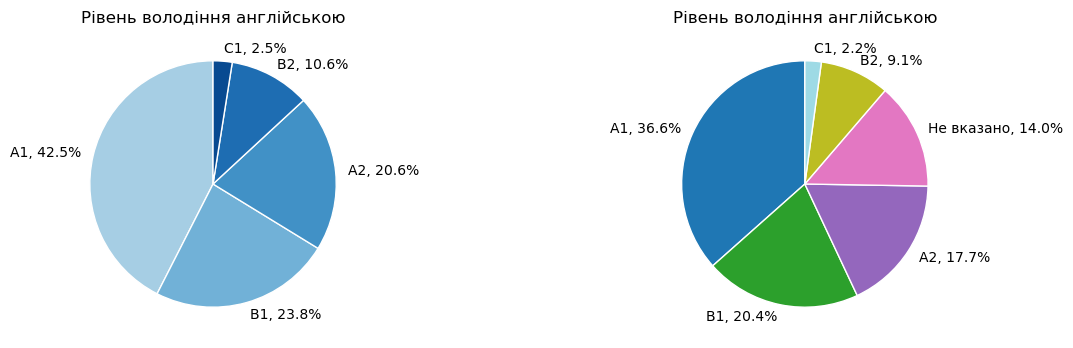

In [158]:
eng_level = df_total['english_level']

eng_level_dict = {
    'початковий (A1)':'A1',
    'елементарний (A2)':'A2',
    'середній (B1)': 'B1', 
    'вище середнього (B2)':'B2', 
    'просунутий (C1)': "C1"
}

eng_level = eng_level.replace(eng_level_dict)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

radical(eng_level, show_nan=False, title="Рівень володіння англійською", ax=axes[0])
radical(eng_level, show_nan=True, title="Рівень володіння англійською", ax=axes[1], set_colors=True)

plt.show()

In [159]:
df_total.head(1)

,Timestamp,sex,occupation,polish_loyalty,other_loyalty,english_level,polish_level,holels_sits,caffee_sits,internet_representation,...,"_tourism_developmentЛітературно-мистецький простір (книгарня-кав’ярня, сцена)",_tourism_developmentМайданчик для регулярних ярмарків,_tourism_developmentМакДональдс чи інший fast-food,_tourism_developmentМузей з інтерактивними технологіями (VR/AR),"_tourism_developmentПарк пригод (мотузковий, zip-line)",_tourism_developmentРекреаційна зона відпочинку з водоймою,"_tourism_developmentСувенірні крамниці, майстерні ремесел",_tourism_developmentТоргово-розважальний центр,_tourism_developmentЦентр історії княжого Володимира,spends_to_tourism
0,2025/09/06 11:41:37 AM GMT+3,Чоловіча,Студент,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",початковий (A1),елементарний (A2),Ні,Частково,Так,...,1,0,1,0,1,1,0,1,1,2250.0


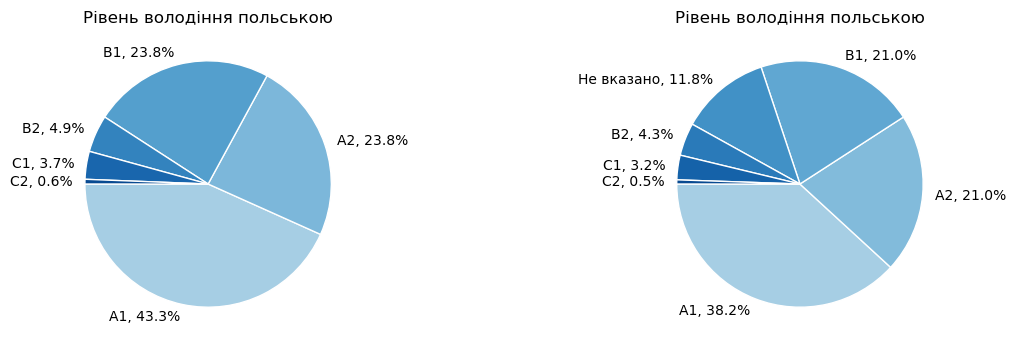

In [164]:
eng_level = df_total['polish_level']

eng_level_dict = {
    'початковий (A1)':'A1',
    'елементарний (A2)':'A2',
    'середній (B1)': 'B1', 
    'вище середнього (B2)':'B2', 
    'просунутий (C1)': "C1",
    'досконалий (C2)': "C2"
}

eng_level = eng_level.replace(eng_level_dict)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

radical(eng_level, show_nan=False, title="Рівень володіння польською", ax=axes[0], angle=180)
radical(eng_level, show_nan=True, title="Рівень володіння польською", ax=axes[1], angle=180)

plt.show()

In [161]:
df_total.head(10)

,Timestamp,sex,occupation,polish_loyalty,other_loyalty,english_level,polish_level,holels_sits,caffee_sits,internet_representation,...,"_tourism_developmentЛітературно-мистецький простір (книгарня-кав’ярня, сцена)",_tourism_developmentМайданчик для регулярних ярмарків,_tourism_developmentМакДональдс чи інший fast-food,_tourism_developmentМузей з інтерактивними технологіями (VR/AR),"_tourism_developmentПарк пригод (мотузковий, zip-line)",_tourism_developmentРекреаційна зона відпочинку з водоймою,"_tourism_developmentСувенірні крамниці, майстерні ремесел",_tourism_developmentТоргово-розважальний центр,_tourism_developmentЦентр історії княжого Володимира,spends_to_tourism
0,2025/09/06 11:41:37 AM GMT+3,Чоловіча,Студент,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",початковий (A1),елементарний (A2),Ні,Частково,Так,...,1,0,1,0,1,1,0,1,1,2250.0
1,2025/09/06 11:43:48 AM GMT+3,Чоловіча,Учень,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",початковий (A1),елементарний (A2),Частково,Так,Так,...,1,0,1,1,1,1,0,1,1,750.0
2,2025/09/06 12:01:46 PM GMT+3,Жіноча,Студент,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",початковий (A1),середній (B1),Ні,Так,Ні,...,1,1,0,0,0,1,0,1,1,2250.0
3,2025/09/06 12:24:55 PM GMT+3,Жіноча,Студент,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",початковий (A1),елементарний (A2),Частково,Частково,Так,...,1,0,1,1,1,0,0,1,1,NaN
4,2025/09/06 12:42:55 PM GMT+3,Жіноча,NaN,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",NaN,NaN,Частково,Так,NaN,...,0,0,0,0,0,1,0,0,0,NaN
5,2025/09/06 12:51:35 PM GMT+3,NaN,Учень,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",середній (B1),середній (B1),Частково,Так,Ні,...,0,0,1,0,0,1,0,1,0,NaN
6,2025/09/06 1:03:43 PM GMT+3,Чоловіча,NaN,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",NaN,середній (B1),Частково,Так,Ні,...,0,0,0,1,1,1,0,0,1,NaN
7,2025/09/06 1:13:28 PM GMT+3,Чоловіча,Працівник,На мене це ніяк не впливає,На мене це ніяк не впливає,початковий (A1),початковий (A1),Ні,Так,Так,...,1,0,1,0,0,1,0,1,1,NaN
8,2025/09/06 1:15:18 PM GMT+3,Чоловіча,Працівник,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",початковий (A1),початковий (A1),Частково,Так,Ні,...,1,0,1,1,1,1,0,1,1,7500.0
9,2025/09/06 1:26:36 PM GMT+3,Жіноча,Учень,"Позитивно, туристи це завжди добре для міста","Позитивно, туристи це завжди добре для міста",початковий (A1),елементарний (A2),Так,Так,Так,...,0,1,1,1,1,1,0,0,1,NaN


#--------------